In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Load the data
df = pd.read_csv("C:\\Desktop\\PROJECT\\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
def preprocess_housing_data(df):
    df = df.copy()
    df = df.join(pd.get_dummies(df["furnishingstatus"]).astype(int))
    df.drop("furnishingstatus", axis=1, inplace=True)
    for col in ['basement', 'prefarea', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning']:
        df[col] = df[col].str.lower().map({'yes': 1, 'no': 0})
    return df

updated_df = preprocess_housing_data(df)

In [5]:
updated_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


<Axes: >

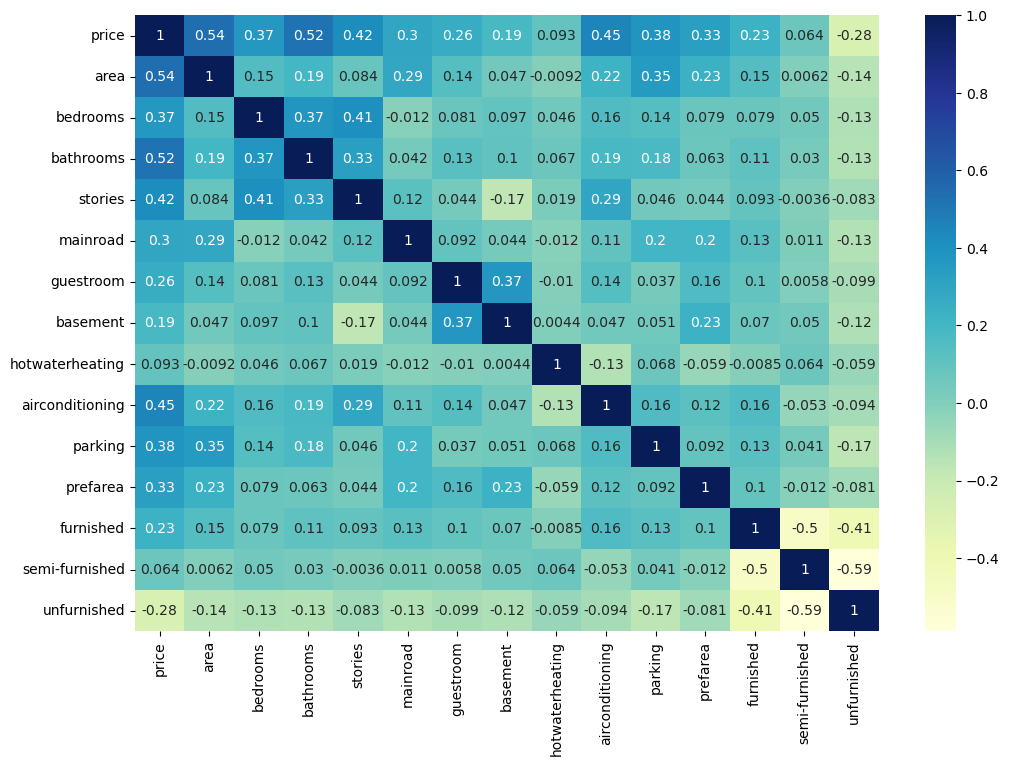

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(updated_df.corr(),annot=True,cmap="YlGnBu")

In [7]:
updated_df["price_per_sqft"] = updated_df["price"] / df["area"]
updated_df["bathrooms_per_bedroom"] = updated_df["bathrooms"] / (updated_df["bedrooms"] + 1)
updated_df["bedrooms_per_area"] = updated_df["bedrooms"] / updated_df["area"]


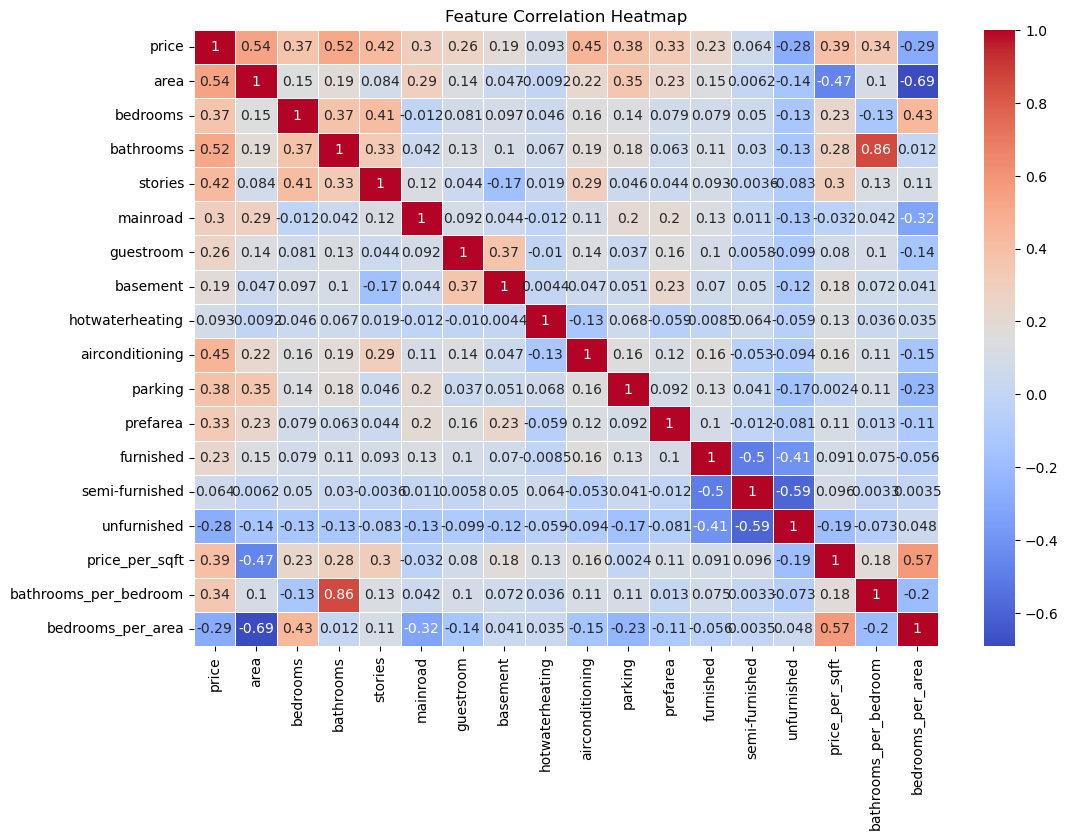

In [8]:
# 1. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(updated_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
updated_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,price_per_sqft,bathrooms_per_bedroom,bedrooms_per_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1792.452830,0.400000,0.000539
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1367.187500,0.800000,0.000446
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,1229.919679,0.500000,0.000301
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,1628.666667,0.400000,0.000533
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,1537.735849,0.200000,0.000539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,606.666667,0.333333,0.000667
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,736.312500,0.250000,0.001250
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,483.425414,0.333333,0.000552
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,601.374570,0.250000,0.001031


In [10]:
X = updated_df.drop(["price"],axis = 1)
y = updated_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scale,y_train)

LinearRegression()

In [12]:
preds = model.predict(X_test_scale)

print("R² Score:", model.score(X_test_scale, y_test))
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", root_mean_squared_error(y_test, preds))
#model.score(X_test_s,y_test)

R² Score: 0.9092671915259822
MAE: 442640.4974970275
RMSE: 677211.4544818526


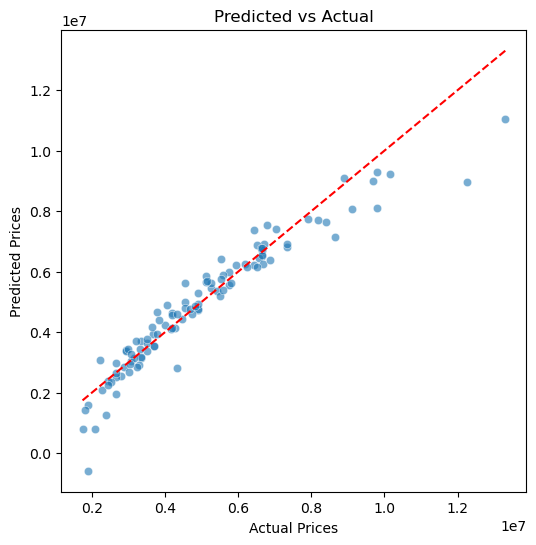

In [13]:
# Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual")
plt.show()

In [14]:
#Improving the model by using RandomForestRegressor


# Tuned Random Forest
forest = RandomForestRegressor(
    n_estimators=500,        # More trees for stability
    max_depth=15,            # Prevents overfitting by limiting depth
    min_samples_split=5,     # Needs at least 5 samples to split a node
    min_samples_leaf=2,      # At least 2 samples per leaf
    max_features='sqrt',     # Random subset of features for each split
    random_state=42,         # Reproducibility
    n_jobs=-1                # Use all CPU cores
)

# Fit the model
forest.fit(X_train_scale, y_train)

# Evaluate
train_r2 = forest.score(X_train_scale, y_train)
test_r2 = forest.score(X_test_scale, y_test)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")



Train R²: 0.9194821853645143
Test R²: 0.7702770016419528


C:\Users\USER\AppData\Local\Temp\ipykernel_16400\633507990.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


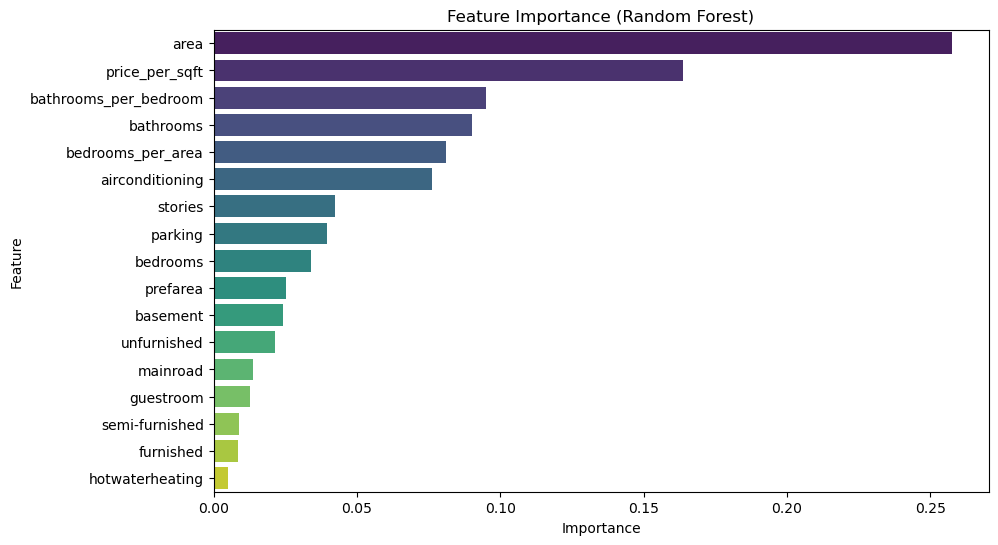

In [15]:
# Feature importance
importances = forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [16]:
# Base model
rf = RandomForestRegressor(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [200, 500, 800],         # More trees = better but slower
    'max_depth': [None, 10, 20, 30],         # None = fully grown trees
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Min samples per leaf node
    'max_features': ['sqrt', 'log2']         # Features considered per split
}

In [17]:
# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'  # could also try 'neg_root_mean_squared_error'
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500, 800]},
             scoring='r2', verbose=2)

In [18]:
# Best model after tuning
best_rf = grid_search.best_estimator_

# Evaluate
print("Best parameters:", grid_search.best_params_)
print("Train R²:", best_rf.score(X_train, y_train))
print("Test R²:", best_rf.score(X_test, y_test))


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Train R²: 0.9739308815382073
Test R²: 0.7971658033321777


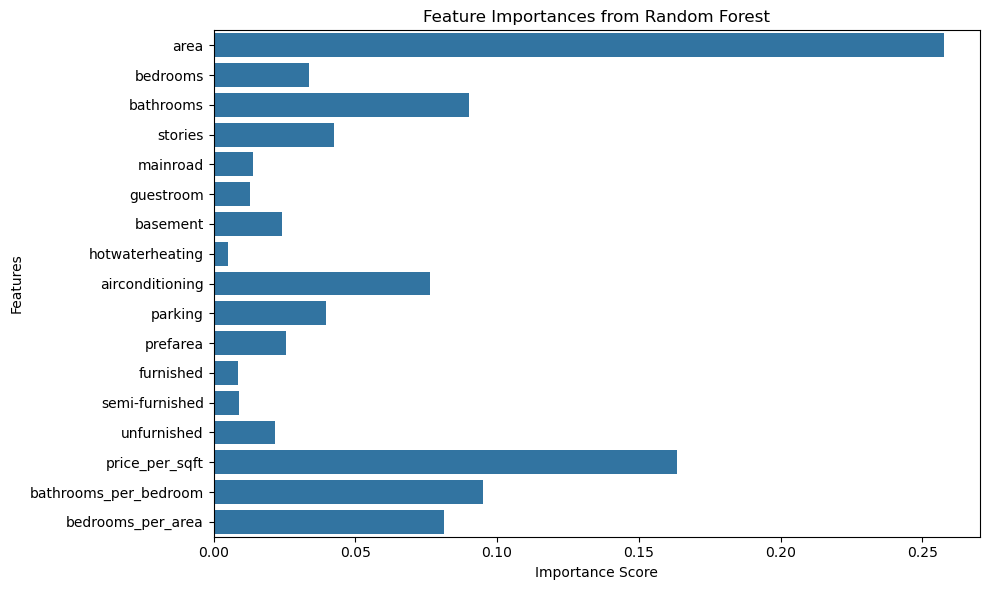

In [19]:
importances = forest.feature_importances_
features = X_train.columns  # Use this instead of X_train_s.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

